# **Detect fraudulent transactions in a credit card dataset.**

In [ ]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/credit_card_fraud_dataset.csv')

In [ ]:
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [ ]:
df.tail(15)

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
99985,99986,2023-11-09 01:03:36.027557,314.63,108,purchase,San Jose,1
99986,99987,2024-06-28 05:00:36.027561,1725.33,836,purchase,San Jose,0
99987,99988,2024-07-20 13:42:36.027564,4778.32,767,refund,New York,0
99988,99989,2023-11-05 01:02:36.027567,1338.71,74,purchase,San Jose,0
99989,99990,2024-09-22 04:09:36.027571,4595.95,938,refund,Dallas,0
99990,99991,2024-01-12 17:50:36.027574,2883.93,231,refund,New York,0
99991,99992,2024-05-28 18:52:36.027577,2173.73,93,purchase,Dallas,0
99992,99993,2024-05-25 06:21:36.027581,3743.94,414,purchase,Chicago,0
99993,99994,2024-04-20 15:33:36.027584,614.02,625,refund,Phoenix,0
99994,99995,2024-02-26 21:22:36.027587,53.49,2,refund,Philadelphia,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [ ]:
df.isnull().sum()

,0
TransactionID,0
TransactionDate,0
Amount,0
MerchantID,0
TransactionType,0
Location,0
IsFraud,0


In [ ]:
df.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(100000, 7)

In [ ]:
for col in df.columns:
  print("Unique values of "+col)
  print(df[col].unique())
  print("===========================================")

Unique values of TransactionID
[     1      2      3 ...  99998  99999 100000]
Unique values of TransactionDate
['2024-04-03 14:15:35.462794' '2024-03-19 13:20:35.462824'
 '2024-01-08 10:08:35.462834' ... '2024-05-31 19:27:36.027597'
 '2024-10-18 09:43:36.027601' '2024-03-05 19:41:36.027606']
Unique values of Amount
[4189.27 2659.71  784.   ... 3448.56 3750.79 1596.79]
Unique values of MerchantID
[ 688  109  394  944  475  302  902  266   32  193  349  359  219  617
  529  462  912  522  456  134   51  196  813  878  521  348  725   44
  605  347  595  163  781  510  469  322  991  369  663  284  788  207
  661   31    4  980  251  334  978  639  620   57  970  430  437  685
  274   12  277   94  400  526  576  879  680  546  555  412  210  363
  112  823  447  619  979  770  807   52  282  926  397  431  701  846
  941  817   87  708  336  188  407  656  818   68  837   37   78  574
  376  934  727  258  441  305  364  339  382  464  714  244  231  443
  455  608  232  955  897  983  

In [ ]:
def transaction_date(date):
  date_new=date.split(" ")[0]
  for i in date_new:
    if i=="-":
      date_new=date_new.replace(i,"")
  return date_new.strip(" ")


In [ ]:
df.TransactionDate=df.TransactionDate.apply(transaction_date)
df.TransactionDate

,TransactionDate
0,20240403
1,20240319
2,20240108
3,20240413
4,20240712
...,...
99995,20240607
99996,20231022
99997,20240531
99998,20241018


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location
0,1,20240403,4189.27,688,refund,San Antonio
1,2,20240319,2659.71,109,refund,Dallas
2,3,20240108,784.00,394,purchase,New York
3,4,20240413,3514.40,944,purchase,Philadelphia
4,5,20240712,369.07,475,purchase,Phoenix
...,...,...,...,...,...,...
99995,99996,20240607,1057.29,289,refund,San Antonio
99996,99997,20231022,297.25,745,refund,San Antonio
99997,99998,20240531,3448.56,690,purchase,San Antonio
99998,99999,20241018,3750.79,644,purchase,Philadelphia


In [ ]:
X.loc[99985]

,99985
TransactionID,99986
TransactionDate,20231109
Amount,314.63
MerchantID,108
TransactionType,purchase
Location,San Jose


In [ ]:
y

,IsFraud
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [ ]:
def one_hot_encode(data_to_encode, original_df):
  encoder=OneHotEncoder(sparse_output=False)
  encoded_array=encoder.fit_transform(data_to_encode)
  encoded_columns=pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out(data_to_encode.columns))
  columns_to_drop = data_to_encode.columns
  df_dropped = original_df.drop(columns=columns_to_drop)
  final_X = pd.concat([df_dropped, encoded_columns], axis=1)
  return final_X

In [ ]:
final_X = one_hot_encode(X[['TransactionType','Location']], X)

In [ ]:
final_X

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType_purchase,TransactionType_refund,Location_Chicago,Location_Dallas,Location_Houston,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Jose
0,1,20240403,4189.27,688,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,20240319,2659.71,109,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,20240108,784.00,394,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,20240413,3514.40,944,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,20240712,369.07,475,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,20240607,1057.29,289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99996,99997,20231022,297.25,745,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99997,99998,20240531,3448.56,690,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,99999,20241018,3750.79,644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
scalar=StandardScaler()
final_X=scalar.fit_transform(final_X)
final_X

array([[-1.73203349,  0.45226441,  1.17316072, ...,  2.9897127 ,
        -0.33538511, -0.32971034],
       [-1.73199885,  0.42979422,  0.11274012, ..., -0.3344803 ,
        -0.33538511, -0.32971034],
       [-1.73196421,  0.37335124, -1.187661  , ..., -0.3344803 ,
        -0.33538511, -0.32971034],
       ...,
       [ 1.73196421,  0.4865047 ,  0.65963778, ...,  2.9897127 ,
        -0.33538511, -0.32971034],
       [ 1.73199885,  0.6167783 ,  0.86916923, ..., -0.3344803 ,
        -0.33538511, -0.32971034],
       [ 1.73203349,  0.42604919, -0.6241661 , ..., -0.3344803 ,
        -0.33538511, -0.32971034]])

In [ ]:
final_X[99985]

array([ 1.73154851, -2.0339016 , -1.51306806, -1.36354833,  1.00262344,
       -1.00262344, -0.33689605, -0.33473897, -0.33316664, -0.33214688,
       -0.33320369, -0.33097646, -0.3325921 , -0.3344803 , -0.33538511,
        3.03296524])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_X,y,test_size=0.2,random_state=42)

In [ ]:
ratio = sum(y_train == 0) / sum(y_train == 1)
model = XGBClassifier(scale_pos_weight=ratio)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
test_predict=model.predict(X_test)

In [ ]:
test_predict

array([0, 0, 1, ..., 0, 0, 0])

Accuracy Score:0.92545
F1 Score:0.018433179723502304


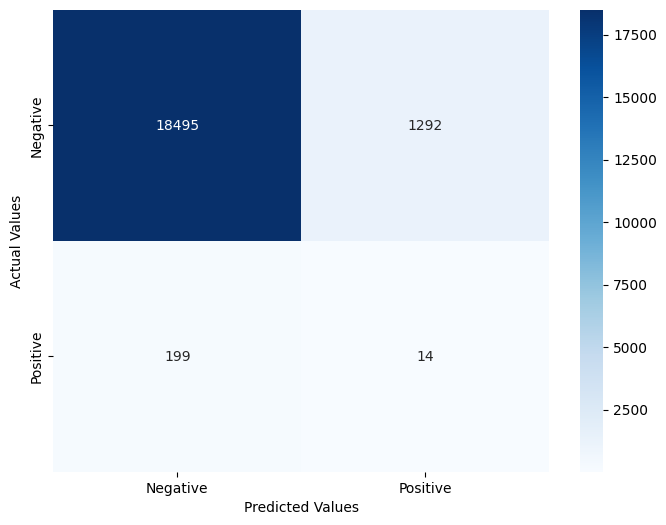

In [ ]:
#For Testing accuracy
accuracy=accuracy_score(y_test,test_predict)
f1=f1_score(y_test,test_predict)
confu_matrix=confusion_matrix(y_test, test_predict)
print(f"Accuracy Score:{accuracy}")
print(f"F1 Score:{f1}")
plt.figure(figsize=(8,6))
sns.heatmap(confu_matrix,annot=True,fmt="d",cmap="Blues",xticklabels={"Negative","Positive"},yticklabels={"Negative","Positive"})
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
test=pd.DataFrame([[ 1.73154851, -2.0339016 , -1.51306806, -1.36354833,  1.00262344,
       -1.00262344, -0.33689605, -0.33473897, -0.33316664, -0.33214688,
       -0.33320369, -0.33097646, -0.3325921 , -0.3344803 , -0.33538511,
        3.03296524]])
print(model.predict(test))
if (model.predict(test)==1):
  print("Fraudulent Transaction")
else:
  print("Non-Fraudulent Transaction")

[1]
Fraudulent Transaction
